22ug1-0392 _ K G V T Gamage_Lab 10_ML

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Customers.csv")

# Display basic info
print(df.info())

# Show first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


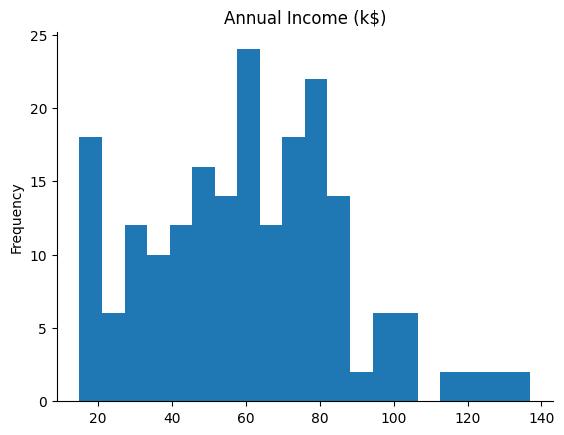

In [ ]:
# @title Annual Income (k$)

from matplotlib import pyplot as plt
df['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Selecting numerical features only
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]


***Apply K-Means***

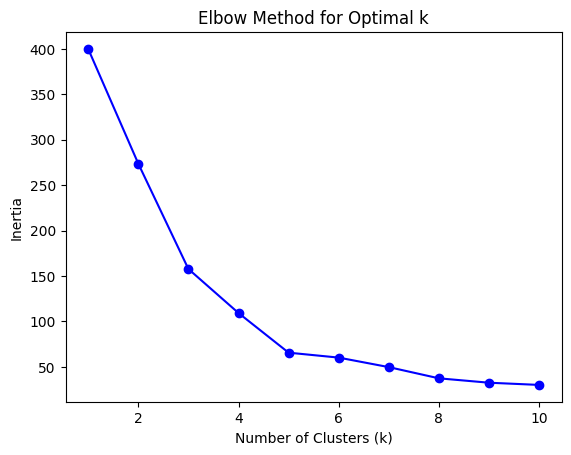

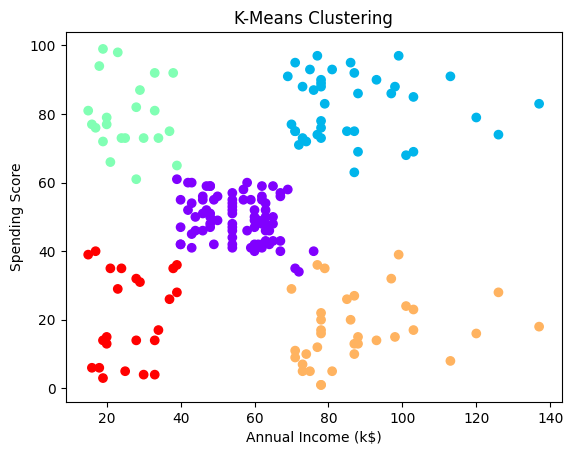

In [ ]:
#Apply K-Means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Elbow method to determine optimal clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply KMeans with optimal k (e.g., k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster_KMeans'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.show()


***Hierarchical Clustering***

In [ ]:
#Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering



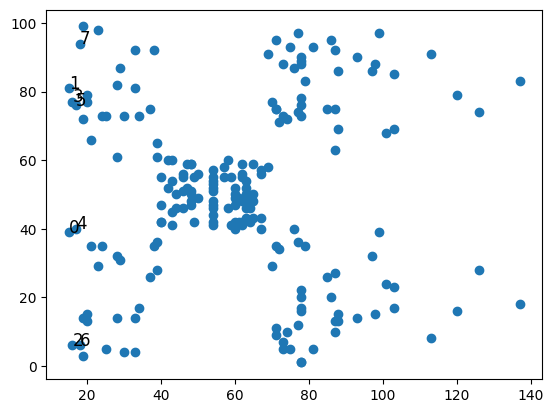

In [ ]:
# plot datapoints as a scatter-plot
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])

# numbering data-points
numbers = [0, 1, 2, 3, 4, 5, 6, 7]
for indx, txt in enumerate(numbers):
    plt.annotate(txt, (df['Annual Income (k$)'][indx], df['Spending Score (1-100)'][indx]), size=12)

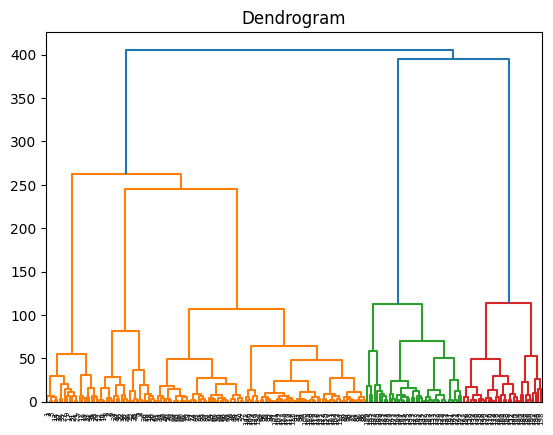

In [ ]:
# plot a dendrogram
import scipy.cluster.hierarchy as sc
dendrogrm = sc.dendrogram(sc.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.show()

In [ ]:
# build a model
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
pred = model.fit_predict(features)

In [ ]:
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [ ]:
data['cluster'] = pred
data

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


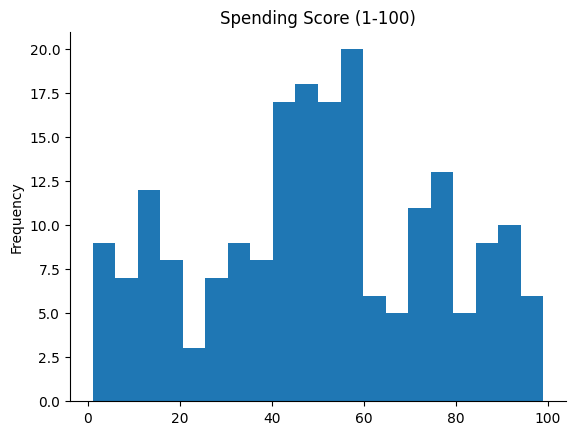

In [ ]:
# @title Spending Score (1-100)

from matplotlib import pyplot as plt
data['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

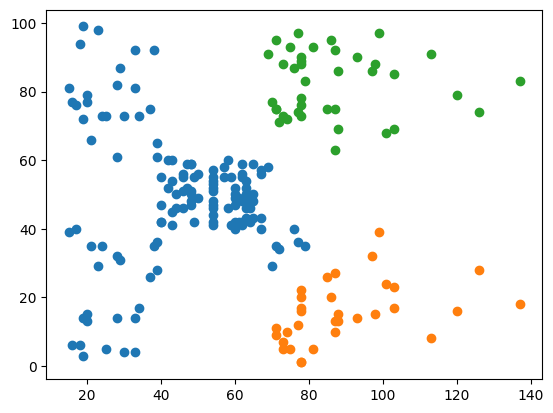

In [ ]:
cluster1 = data[data['cluster']==0]
plt.scatter(cluster1['Annual Income (k$)'], cluster1['Spending Score (1-100)'])

cluster2 = data[data['cluster']==1]
plt.scatter(cluster2['Annual Income (k$)'], cluster2['Spending Score (1-100)'])

cluster3 = data[data['cluster']==2]
plt.scatter(cluster3['Annual Income (k$)'], cluster3['Spending Score (1-100)'])

***k feature_selection_unsupervised_learning***

In [ ]:
#k feature_selection_unsupervised_learning
from sklearn.feature_selection import VarianceThreshold

# Remove low-variance features (if any)
selector = VarianceThreshold(threshold=0.1)
X_var = selector.fit_transform(X_scaled)

# Optionally: remove correlated features
corr_matrix = pd.DataFrame(X_var).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# You may re-run KMeans or Hierarchical with new X_var (or reduced feature set)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)
selected_features = selector.fit_transform(features)

data = pd.DataFrame(selected_features, columns=selector.get_feature_names_out())
print(data)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


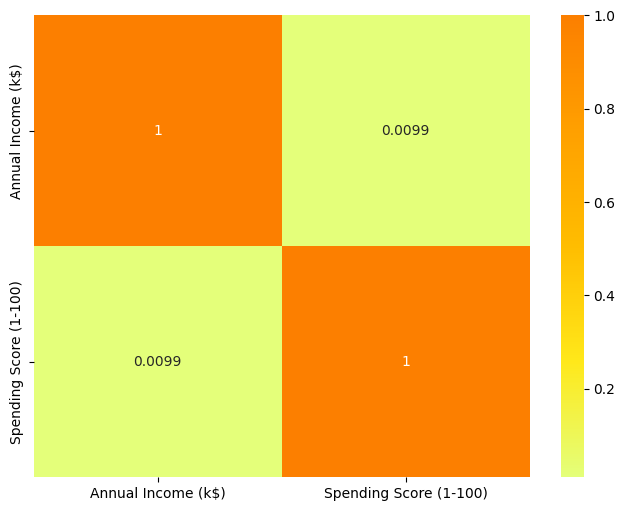

In [ ]:
#Pearson Correlation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
cor = data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap='Wistia')
plt.show()

In [ ]:
corr_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.9:
            colname = cor.columns[i]
            corr_features.add(colname)

In [ ]:
corr_features

set()

In [ ]:
data = data.drop(corr_features, axis=1)
print(data)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]
